# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
# Added dotenv and os for importing API key later
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from dotenv import load_dotenv
import os
import json

# Import the OpenWeatherMap API key
load_dotenv()
api_key = os.getenv('OPEN_WEATHERMAP_API_KEY')

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Set the random seed so the data is reproducible
np.random.seed(42)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

# Print out the latitude, longtitude and city list to check data generated successfully
print(lats)
print(lngs)
print(cities)

Number of cities in the list: 583
[-22.58277861  81.12857515  41.75890953 ...  -6.57107212 -21.63855957
  65.40005692]
[   6.86944265   -7.49452405 -170.76885631 ...  -68.47637068  -75.58360849
  133.70905231]
['walvis bay', 'olonkinbyen', 'bethel', 'saint-francois', 'grytviken', 'port elizabeth', 'sandnessjoen', 'tokar', 'laojunmiao', 'albany', 'dudinka', 'klyuchi', 'waitangi', 'puerto natales', 'tolanaro', 'colonia', 'puerto baquerizo moreno', 'ulladulla', 'ocean pointe', 'invercargill', 'punta del este', 'afaahiti', 'jamestown', 'thunder bay', 'mitu', 'da nang', 'bredasdorp', 'punta cana', 'port alfred', 'port-aux-francais', 'iqaluit', 'isafjordur', 'sitka', 'adamstown', 'yuma', 'luanda', 'taiohae', 'thompson', 'queenstown', 'mhamid', 'margaret river', 'mbaiki', 'kailua-kona', 'bilibino', "slobozhans'ke", 'udachny', 'ust-nera', 'ciudad de huajuapan de leon', 'yellowknife', 'blackmans bay', 'broken hill', 'ribas do rio pardo', 'ancud', 'kodinsk', 'coquimbo', 'nova sintra', 'kodiak', 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# For temperature in Celsius and wind speed in meter/sec based on the API document
unit = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&q={city}&units={unit}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | walvis bay
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | saint-francois
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | sandnessjoen
Processing Record 8 of Set 1 | tokar
Processing Record 9 of Set 1 | laojunmiao
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | dudinka
Processing Record 12 of Set 1 | klyuchi
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | tolanaro
Processing Record 16 of Set 1 | colonia
Processing Record 17 of Set 1 | puerto baquerizo moreno
Processing Record 18 of Set 1 | ulladulla
Processing Record 19 of Set 1 | ocean pointe
City not found. Skipping...
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | punta del este
Processing

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,walvis bay,-22.9575,14.5053,13.38,84,3,1.26,NA,1722721405
1,olonkinbyen,70.9221,-8.7187,5.49,91,90,3.08,SJ,1722721576
2,bethel,41.3712,-73.4140,26.47,91,75,1.54,US,1722721342
3,saint-francois,46.4154,3.9054,18.69,83,0,2.57,FR,1722721578
4,grytviken,-54.2811,-36.5092,-4.82,91,100,4.10,GS,1722721580


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [193]:
# Read saved data
# Add the parameter "keep_default_na=False" to prevent country code "NA" to be read as NaN
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID", keep_default_na=False)

# Rename some columns to make the units of each column more clear.
city_data_renamed = city_data_df.rename(columns={'Max Temp': 'Max Temp (C)', 'Humidity': 'Humidity (%)', 'Cloudiness': 'Cloudiness (%)', 'Wind Speed': 'Wind Speed (m/s)'})

# Display sample data
city_data_renamed.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,walvis bay,-22.9575,14.5053,13.38,84,3,1.26,NA,1722721405
1,olonkinbyen,70.9221,-8.7187,5.49,91,90,3.08,SJ,1722721576
2,bethel,41.3712,-73.4140,26.47,91,75,1.54,US,1722721342
3,saint-francois,46.4154,3.9054,18.69,83,0,2.57,FR,1722721578
4,grytviken,-54.2811,-36.5092,-4.82,91,100,4.10,GS,1722721580


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

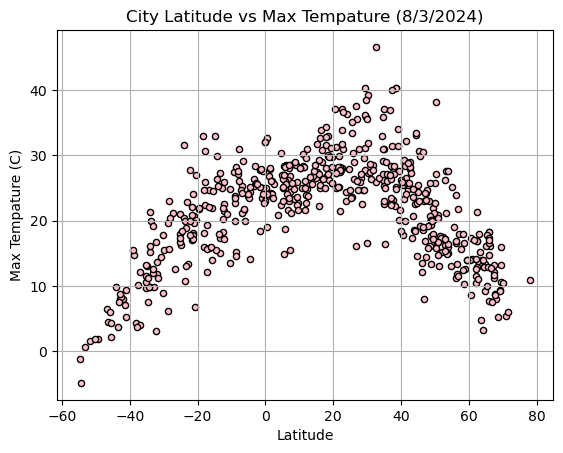

In [198]:
# Build scatter plot for latitude vs. temperature
city_data_renamed.plot(kind = 'scatter', x='Lat', y='Max Temp (C)', grid=True, xlabel='Latitude',\
                        ylabel='Max Tempature (C)', title='City Latitude vs Max Tempature (8/3/2024)',\
                        c='pink', edgecolor= 'black')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

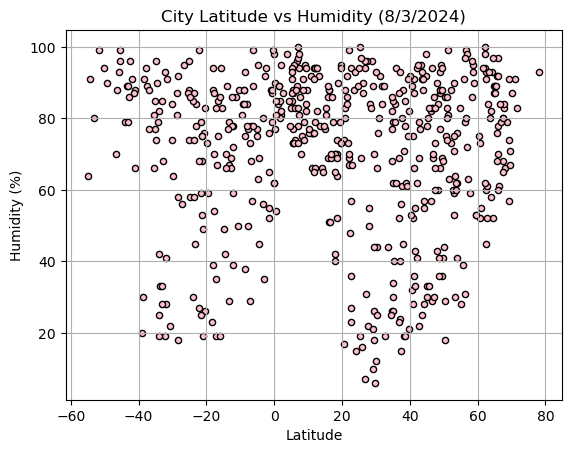

In [199]:
# Build the scatter plots for latitude vs. humidity
city_data_renamed.plot(kind = 'scatter', x='Lat', y='Humidity (%)', grid=True, xlabel='Latitude',\
                      ylabel='Humidity (%)', title='City Latitude vs Humidity (8/3/2024)',\
                      c='pink', edgecolor= 'black')


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

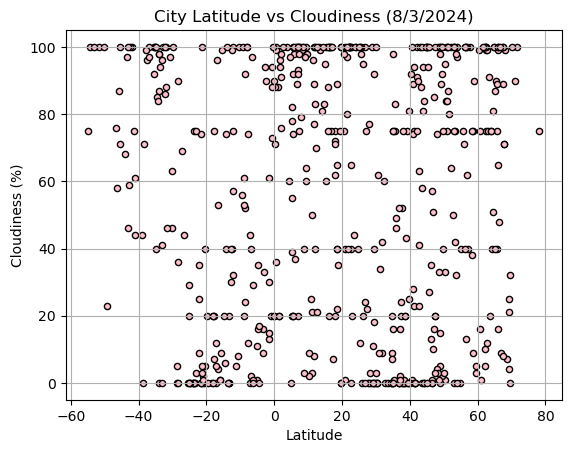

In [200]:
# Build the scatter plots for latitude vs. cloudiness
city_data_renamed.plot(kind = 'scatter', x='Lat', y='Cloudiness (%)', grid=True, xlabel='Latitude',\
                      ylabel='Cloudiness (%)', title='City Latitude vs Cloudiness (8/3/2024)',\
                      c='pink', edgecolor= 'black')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

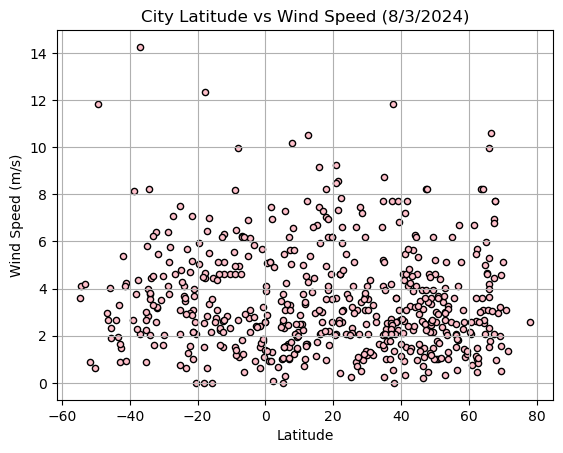

In [201]:
# Build the scatter plots for latitude vs. wind speed
city_data_renamed.plot(kind = 'scatter', x='Lat', y='Wind Speed (m/s)', grid=True, xlabel='Latitude',\
                        ylabel='Wind Speed (m/s)', title='City Latitude vs Wind Speed (8/3/2024)',\
                        c='pink', edgecolor= 'black')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [319]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_col, y_col):
    x_values = df[x_col]
    y_values = df[y_col]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r value is: {rvalue}")
    print(f"The r^2 value is: {rvalue**2}")
    regress_values = x_values * slope + intercept
    line_equation = "y= " + str(round(slope,2))+ "x+ " +str(round(intercept,2))
    df.plot(kind = 'scatter', x= x_col, y= y_col, xlabel= 'Latitude', ylabel= y_col, title= f'City Latitude vs {y_col}')
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_equation, (0,32), fontsize=12, color='r')
    plt.show()


In [329]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_renamed.loc[(city_data_renamed['Lat'] > 0) | (city_data_renamed['Lat'] == 0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,5.49,91,90,3.08,SJ,1722721576
2,bethel,41.3712,-73.4140,26.47,91,75,1.54,US,1722721342
3,saint-francois,46.4154,3.9054,18.69,83,0,2.57,FR,1722721578
6,sandnessjoen,66.0217,12.6316,18.29,78,16,5.31,NO,1722721605
7,tokar,18.4254,37.7290,32.92,52,89,3.92,SD,1722721606


In [330]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_renamed.loc[(city_data_renamed['Lat'] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,walvis bay,-22.9575,14.5053,13.38,84,3,1.26,NA,1722721405
4,grytviken,-54.2811,-36.5092,-4.82,91,100,4.10,GS,1722721580
5,port elizabeth,-33.9180,25.5701,15.17,42,87,3.77,ZA,1722721581
12,waitangi,-43.9535,-176.5597,9.90,79,68,2.68,NZ,1722721612
13,puerto natales,-51.7236,-72.4875,1.65,99,100,0.88,CL,1722721613


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.6208211778043976
The r^2 value is: 0.3854189348104395


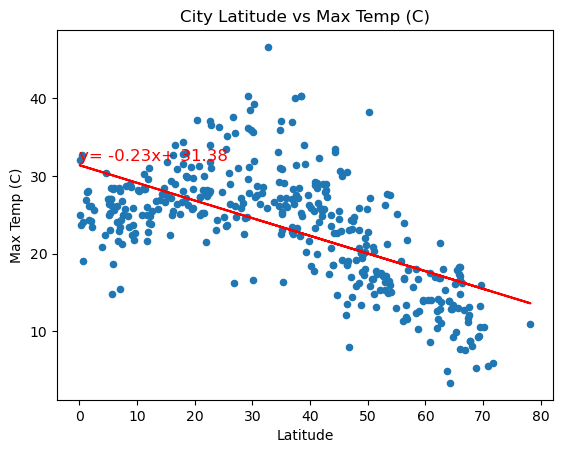

In [321]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Max Temp (C)')


The r value is: 0.8089207153483354
The r^2 value is: 0.6543527237196627


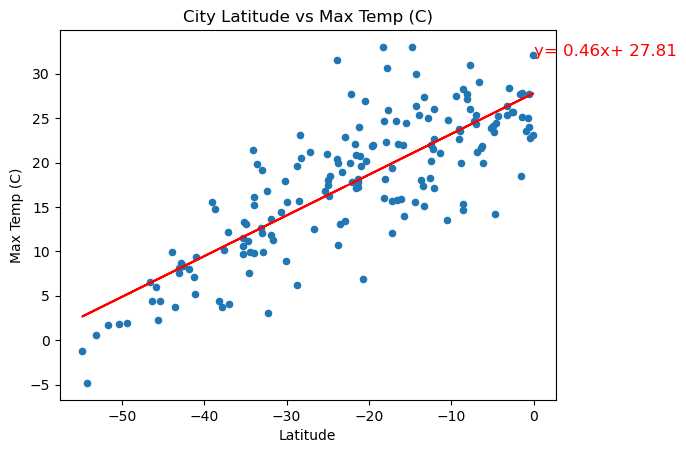

In [322]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Max Temp (C)')

**Discussion about the linear relationship:** 

The above two plots model the relationship between the latitude and maximum temperature (in Celsius) of 559 cities, one for Northern Hemisphere cities and the other for Southern Hemisphere cities. 

The r-value and r-squared value for the Northern Hemisphere data are -0.62082 and 0.38541 respectively. The absolute value of r is 0.62, indicating a moderate correlation between latitude and maximum temperature. The r-squared value of 0.38 suggests that approximately 38% of the variability in maximum temperature can be explained by latitude.

The r-value and r-squared value for the Southern Hemisphere data are 0.80892 and 0.65435 respectively. The absolute value of r is 0.81, indicating a strong correlation between latitude and maximum temperature. The r-squared value of 0.65 suggests that approximately 65% of the variability in maximum temperature can be explained by latitude.

These findings conclude that latitude and maximum temperature are correlated in both the Northern and Southern Hemispheres as expected. 

### Humidity vs. Latitude Linear Regression Plot

The r value is: -0.08859505161948716
The r^2 value is: 0.007849083171459595


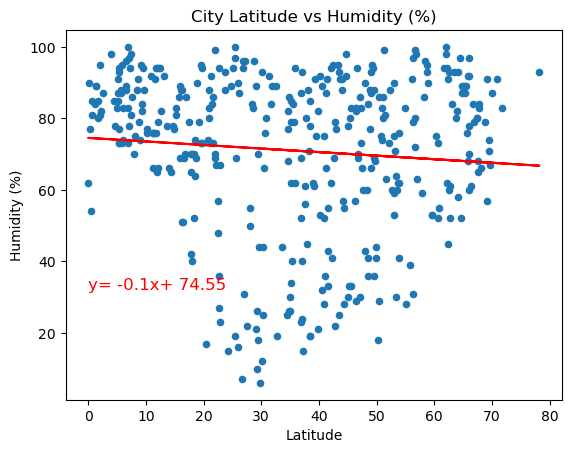

In [323]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Humidity (%)')

The r value is: -0.06704877149001855
The r^2 value is: 0.004495537758320724


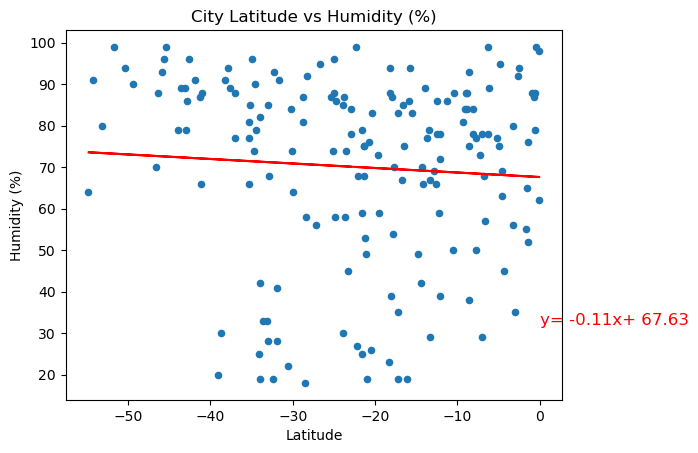

In [324]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Humidity (%)')

**Discussion about the linear relationship:** 

In this section, we model the relationship between the latitude and humidity (%)of 559 cities, one for Northern Hemisphere cities and the other for Southern Hemisphere cities. 

The r-value and r-squared value for the Northern Hemisphere data are -0.08859 and 0.00784 respectively. The absolute value of r is 0.088, indicating either none or very weak correlation between latitude and humidity. The r-squared value of 0.008 suggests that only 0.8% of the variability in humidity can be explained by latitude.

The r-value and r-squared value for the Southern Hemisphere data are -0.06704 and 0.00449 respectively. The absolute value of r is 0.067, indicating either none or very weak correlation between latitude and humidity. The r-squared value of 0.004 suggests that only 0.4% of the variability in humidity can be explained by latitude.

These findings conclude that there is no obvious correlation between latitude and humidity in either the Northern or Southern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: -0.0783216664679392
The r^2 value is: 0.0061342834383151116


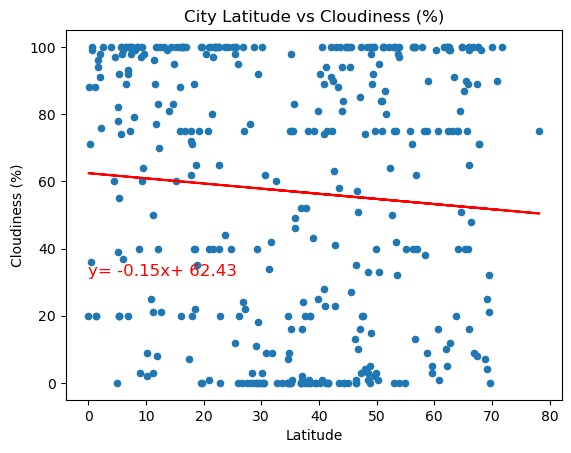

In [325]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Cloudiness (%)')

The r value is: -0.33447274217515977
The r^2 value is: 0.11187201525817089


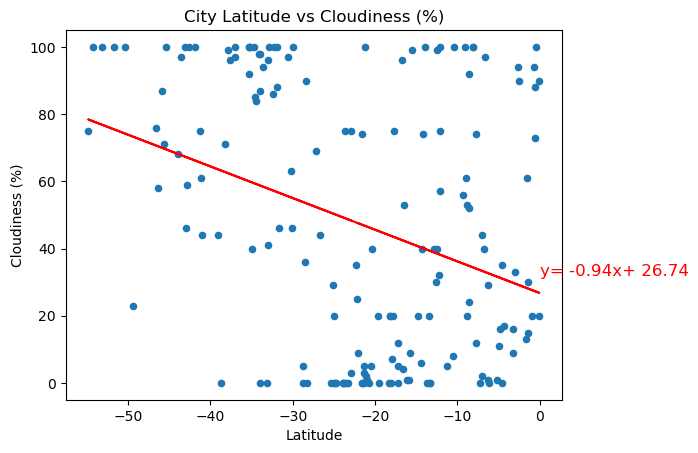

In [326]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Cloudiness (%)')

**Discussion about the linear relationship:** 

In this section, we model the relationship between the latitude and cloudiness (%) of 559 cities, one for Northern Hemisphere cities and the other for Southern Hemisphere cities. 

The r-value and r-squared value for the Northern Hemisphere data are -0.07832 and 0.00613 respectively. The absolute value of r is 0.078, indicating either none or very weak correlation between latitude and cloudiness. The r-squared value of 0.006 suggests that only 0.6% of the variability in cloudiness can be explained by latitude.

The r-value and r-squared value for the Southern Hemisphere data are -0.33447 and 0.11187 respectively. The absolute value of r is 0.334, indicating a weak correlation between latitude and cloudiness. The r-squared value of 0.111 suggests that 11.1% of the variability in cloudiness can be explained by latitude.

These findings conclude that there is no strong correlation between latitude and cloudiness in either the Northern or Southern Hemisphere. However, it is interesting to note that the correlation in the Southern Hemisphere is higher than in the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.03477603012186225
The r^2 value is: 0.0012093722710366705


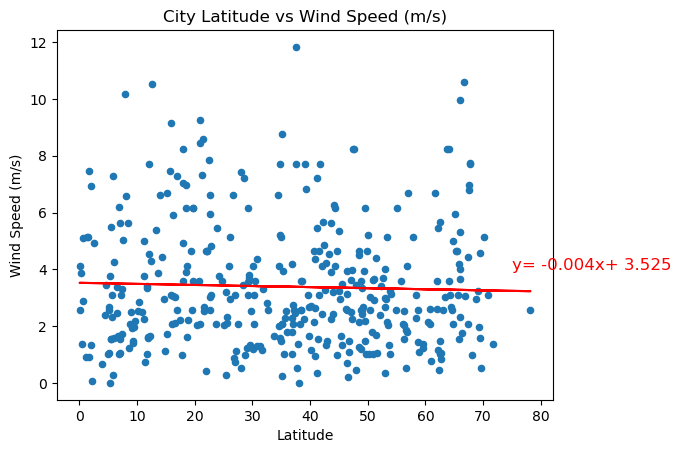

In [327]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed (m/s)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
print(f"The r value is: {rvalue}")
print(f"The r^2 value is: {rvalue**2}")
regress_values = x * slope + intercept
line_equation = "y= " + str(round(slope,3))+ "x+ " +str(round(intercept,3))
northern_hemi_df.plot(kind = 'scatter', x= 'Lat', y= 'Wind Speed (m/s)', xlabel= 'Latitude', ylabel= 'Wind Speed (m/s)', title= 'City Latitude vs Wind Speed (m/s)')
plt.plot(x, regress_values, "r-")
plt.annotate(line_equation, (75,4), fontsize=12, color='r')
plt.show()


The r value is: -0.050728248354580806
The r^2 value is: 0.00257335518112403


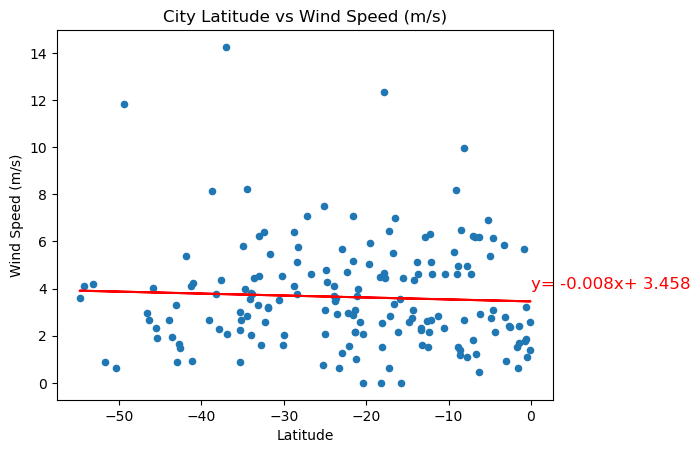

In [328]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed (m/s)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
print(f"The r value is: {rvalue}")
print(f"The r^2 value is: {rvalue**2}")
regress_values = x * slope + intercept
line_equation = "y= " + str(round(slope,3))+ "x+ " +str(round(intercept,3))
southern_hemi_df.plot(kind = 'scatter', x= 'Lat', y= 'Wind Speed (m/s)', xlabel= 'Latitude', ylabel= 'Wind Speed (m/s)', title= 'City Latitude vs Wind Speed (m/s)')
plt.plot(x, regress_values, "r-")
plt.annotate(line_equation, (0,4), fontsize=12, color='r')
plt.show()

**Discussion about the linear relationship:** 

In this section, we model the relationship between the latitude and wind speed (m/s) of 559 cities, with separate plots for Northern Hemisphere and Southern Hemisphere cities. 

The r-value and r-squared value for the Northern Hemisphere data are -0.03477 and 0.00120 respectively. The absolute value of r is 0.034, indicating either none or very weak correlation between latitude and wind speed. The r-squared value of 0.001 suggests that only 0.1% of the variability in wind speed can be explained by latitude.

The r-value and r-squared value for the Southern Hemisphere data are -0.05072 and 0.00257 respectively. The absolute value of r is 0.050, indicating either none or very weak correlation between latitude and wind speed. The r-squared value of 0.003 suggests that only 0.3% of the variability in wind speed can be explained by latitude.

These findings conclude that there is no strong correlation between latitude and wind speed in either the Northern or Southern Hemisphere, as expected.